In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

In [0]:
# Python notebook cell to show more output, rather than just showing the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pandas option to show more columns, rather than truncating some in the middle
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', -1)

In [4]:
data = pd.read_csv("cars.csv")
#print(data)
data.head()

,Vehicle Name,Type,Drive,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
0,Acura 3.5 RL,Sedan,Front-wheel,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL Navigation,Sedan,Front-wheel,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,SUV,All-wheel,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX S,Sports,Rear-wheel,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX,Sedan,Front-wheel,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [31]:
price_weight_horsepower = data[['Retail','Weight','Horsepower']]
price_weight_horsepower.head()

,Retail,Weight,Horsepower
0,43755,3880,225
1,46100,3893,225
2,36945,4451,265
3,89765,3153,290
4,23820,2778,200


In [0]:
# use sklearn StandardScaler to standardize the data to mean 0, standard deviation 1,  Z=(X-u)/s
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
scaled_price_weight_horsepower = scaler.fit_transform(price_weight_horsepower)
print(price_weight_horsepower.head(10))
for i in range(10):
  print('{0:2d}-->'.format(i),end="")
  print('price:{0:9.6f}  '.format(scaled_price_weight_horsepower[i][0]),end="")
  print('weight:{0:9.6f}  '.format(scaled_price_weight_horsepower[i][1]),end="")
  print('horsepower:{0:9.6f}  '.format(scaled_price_weight_horsepower[i][2]),end="")
  print('')

   Retail  Weight  Horsepower
0  43755   3880    225       
1  46100   3893    225       
2  36945   4451    265       
3  89765   3153    290       
4  23820   2778    200       
5  33195   3575    270       
6  26990   3230    200       
7  25940   3252    170       
8  35940   3638    170       
9  42490   3814    220       
 0-->price: 0.534227  weight: 0.492905  horsepower: 0.150424  
 1-->price: 0.653268  weight: 0.511342  horsepower: 0.150424  
 2-->price: 0.188527  weight: 1.302729  horsepower: 0.720452  
 3-->price: 2.869863  weight:-0.538168  horsepower: 1.076720  
 4-->price:-0.477746  weight:-1.070014  horsepower:-0.205843  
 5-->price:-0.001837  weight: 0.060336  horsepower: 0.791706  
 6-->price:-0.316825  weight:-0.428962  horsepower:-0.205843  
 7-->price:-0.370127  weight:-0.397761  horsepower:-0.633365  
 8-->price: 0.137510  weight: 0.149687  horsepower:-0.633365  
 9-->price: 0.470011  weight: 0.399300  horsepower: 0.079171  


In [0]:
vehicle_types = data['Type']
scaled_price_weight_horsepower_df = pd.DataFrame(scaled_price_weight_horsepower,columns=['scaled_price','scaled_weight','scaled_horsepower']) 
scaled_price_weight_horsepower_df.index = vehicle_types.index
scaled_type_price_weight_horsepower_df = pd.concat([vehicle_types, scaled_price_weight_horsepower_df], axis = 1) 
#scaled_type_price_weight_horsepower_df.head()

vehicle_types_uniq = vehicle_types.unique()

In [95]:
print('The types of vehicles, and the number of vehicles: ')
for i in range(len(vehicle_types_uniq)):
    print('{0:2d}:{1:>8} {2:3d}  '.format(i,vehicle_types_uniq[i],len(data.loc[data['Type']==vehicle_types_uniq[i]])))

The types of vehicles, and the number of vehicles: 
 0:   Sedan 234  
 1:     SUV  59  
 2:  Sports  45  
 3:   Wagon  28  
 4: Minivan  21  


In [108]:
import scipy.stats as st
# divide the Z normal curve into 5 bins  |  1  |   2 |    3    |   4  |  5  |
#                                        |   cheap   | average |  expensive |
print('    cheap',st.norm.ppf(1/5))
print('    cheap',st.norm.ppf(2/5))
print('  average',st.norm.ppf(3/5))
print('expensive',st.norm.ppf(4/5))

    cheap -0.8416212335729142
    cheap -0.2533471031357997
  average 0.2533471031357997
expensive 0.8416212335729143


In [93]:
print('The types of vehicles and the corresponding price: ')
for i in range(len(vehicle_types_uniq)):
    print('{0:2d}:{1:>8} {2:3d}  '.format(i,vehicle_types_uniq[i],len(data.loc[data['Type']==vehicle_types_uniq[i]])),end="")
    mMax =  np.max(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_price'])
    mMin =  np.min(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_price'])
    mAve = np.mean(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_price'])
    print('{0:6.3f} <--> {1:5.3f}  mean={2:6.3f} '.format(mMin,mMax,mAve),end="")
    if mAve<st.norm.ppf(2/5):
        print("   (cheap)   ",end="")
    else:
        if mAve<st.norm.ppf(3/5):
            print(" (average)  ",end="")
        else:
            print("(expensive) ",end="")
    print('')

The types of vehicles and the corresponding price: 
 0:   Sedan 234  -1.165 <--> 4.832  mean=-0.176  (average)  
 1:     SUV  59  -0.816 <--> 2.215  mean= 0.073  (average)  
 2:  Sports  45  -0.756 <--> 8.083  mean= 1.074 (expensive) 
 3:   Wagon  28  -1.083 <--> 1.393  mean=-0.193  (average)  
 4: Minivan  21  -0.640 <--> 0.261  mean=-0.286    (cheap)   


In [102]:
print('The types of vehicles, and the corresponding weight: ')
for i in range(len(vehicle_types_uniq)):
    print('{0:2d}:{1:>8} {2:3d}  '.format(i,vehicle_types_uniq[i],len(data.loc[data['Type']==vehicle_types_uniq[i]])),end="")
    mMax =  np.max(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_weight'])
    mMin =  np.min(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_weight'])
    mAve = np.mean(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_weight'])
    print('{0:6.3f} <--> {1:5.3f}  mean={2:6.3f} '.format(mMin,mMax,mAve),end="")
    if mAve<st.norm.ppf(2/5):
        print("(small)   ",end="")
    else:
        if mAve<st.norm.ppf(3/5):
            print("(average)  ",end="")
        else:
            print(" (big) ",end="")
    print('')

The types of vehicles, and the corresponding weight: 
 0:   Sedan 234  -2.386 <--> 1.335  mean=-0.311 (small)   
 1:     SUV  59  -0.945 <--> 4.067  mean= 1.227  (big) 
 2:  Sports  45  -1.897 <--> 1.272  mean=-0.337 (small)   
 3:   Wagon  28  -1.571 <--> 1.620  mean=-0.095 (average)  
 4: Minivan  21  -0.601 <--> 1.801  mean= 0.864  (big) 


In [105]:
print('The types of vehicles, and the corresponding horsepower: ')
for i in range(len(vehicle_types_uniq)):
    print('{0:2d}:{1:>8} {2:3d}  '.format(i,vehicle_types_uniq[i],len(data.loc[data['Type']==vehicle_types_uniq[i]])),end="")
    mMax =  np.max(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_horsepower'])
    mMin =  np.min(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_horsepower'])
    mAve = np.mean(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']==vehicle_types_uniq[i]]['scaled_horsepower'])
    print('{0:6.3f} <--> {1:5.3f}  mean={2:6.3f} '.format(mMin,mMax,mAve),end="")
    if mAve<st.norm.ppf(2/5):
        print("(small h/p)   ",end="")
    else:
        if mAve<st.norm.ppf(3/5):
            print("(average h/p)  ",end="")
        else:
            print(" (large h/p) ",end="")
    print('')

The types of vehicles, and the corresponding horsepower: 
 0:   Sedan 234  -2.016 <--> 3.970  mean=-0.209 (average h/p)  
 1:     SUV  59  -1.203 <--> 1.789  mean= 0.287  (large h/p) 
 2:  Sports  45  -1.089 <--> 3.970  mean= 0.950  (large h/p) 
 3:   Wagon  28  -1.574 <--> 1.789  mean=-0.247 (average h/p)  
 4: Minivan  21  -1.061 <--> 0.364  mean=-0.186 (average h/p)  


Text(0.5, 0, 'scaled_price')

Text(0.5, 0, 'scaled_weight')

Text(0.5, 0, 'scaled_horsepower')

(-2.0, 8.0)

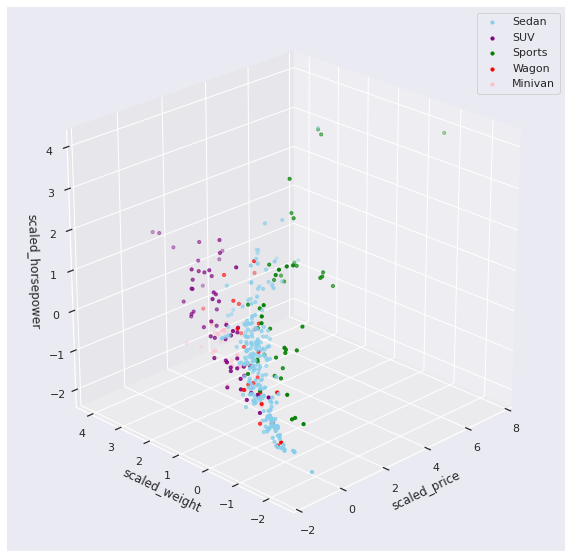

In [144]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sedan']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sedan']['scaled_weight'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sedan']['scaled_horsepower'],
           c='skyblue', label='Sedan',s=10)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='SUV']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='SUV']['scaled_weight'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='SUV']['scaled_horsepower'],
           c='purple', label='SUV',s=10)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sports']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sports']['scaled_weight'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sports']['scaled_horsepower'],
           c='green', label='Sports',s=10)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Wagon']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Wagon']['scaled_weight'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Wagon']['scaled_horsepower'],
           c='red', label='Wagon',s=10)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Minivan']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Minivan']['scaled_weight'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Minivan']['scaled_horsepower'],
           c='pink', label='Minivan',s=10)
ax.set_xlabel('scaled_price')
ax.set_ylabel('scaled_weight')
ax.set_zlabel('scaled_horsepower')
ax.set_xlim(left=-2,right=8)
ax.view_init(25, 225)   # (tilt up/down, turn right/left)
ax.legend()
plt.show()


Text(0.5, 0, 'scaled_price')

Text(0, 0.5, 'scaled_weight')

(-2.0, 9.0)

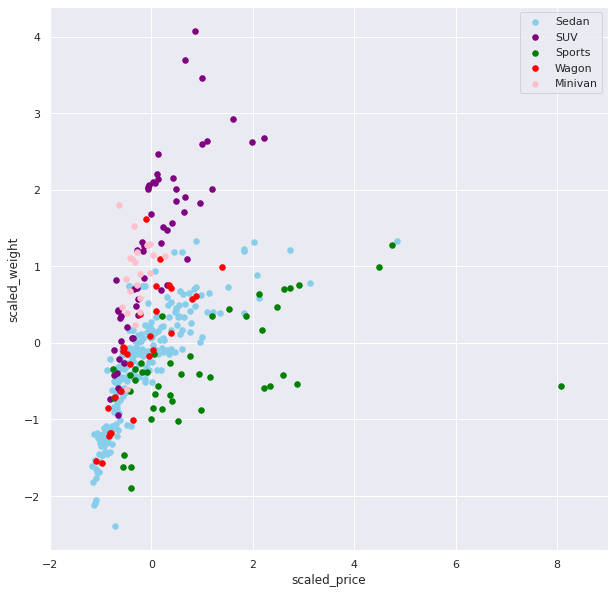

In [158]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sedan']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sedan']['scaled_weight'],
           c='skyblue', label='Sedan',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='SUV']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='SUV']['scaled_weight'],
           c='purple', label='SUV',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sports']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sports']['scaled_weight'],
           c='green', label='Sports',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Wagon']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Wagon']['scaled_weight'],
           c='red', label='Wagon',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Minivan']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Minivan']['scaled_weight'],
           c='pink', label='Minivan',s=30)
ax.set_xlabel('scaled_price')
ax.set_ylabel('scaled_weight')
ax.set_xlim(left=-2,right=9)
ax.legend()
plt.show()

Text(0.5, 0, 'scaled_price')

Text(0, 0.5, 'scaled_horsepower')

(-2.0, 9.0)

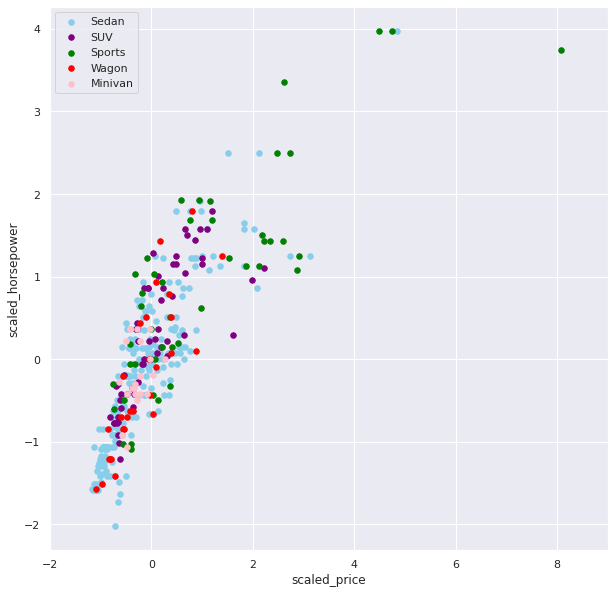

In [159]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sedan']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sedan']['scaled_horsepower'],
           c='skyblue', label='Sedan',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='SUV']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='SUV']['scaled_horsepower'],
           c='purple', label='SUV',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sports']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Sports']['scaled_horsepower'],
           c='green', label='Sports',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Wagon']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Wagon']['scaled_horsepower'],
           c='red', label='Wagon',s=30)
ax.scatter(scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Minivan']['scaled_price'],
           scaled_type_price_weight_horsepower_df[scaled_type_price_weight_horsepower_df['Type']=='Minivan']['scaled_horsepower'],
           c='pink', label='Minivan',s=30)
ax.set_xlabel('scaled_price')
ax.set_ylabel('scaled_horsepower')
ax.set_xlim(left=-2,right=9)
ax.legend()
plt.show()